6/8/23, 1:12 PM Untitled11

> **Image Captioning**
>
> **Introduction**
>
> This assignment aims to describe the content of an image by using CNNs
> and RNNs to build an Image Caption Generator. The model would be based
> on the paper \[4\] and it will be  
> implemented using Tensorflow and Keras. The dataset used is Flickr 8K
> \[5\], consisting of 8,000 images each one paired with five different
> captions to provide clear descriptions.
>
> The model architectures consists of a CNN which extracts the features
> and encodes the input image and a Recurrent Neural Network (RNN) based
> on Long Short Term Memory (LSTM) layers. The most significant
> difference with other models is that the image embedding is provided
> as the first input to the RNN network and only once.
>
> **Required Dependencies**

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><p>In [ ]:</p>
<p>In [15]:</p></th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>!</strong>pip install tensorflow</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>
<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>import</strong> os<br />
<strong>import</strong> zipfile<br />
<strong>import</strong> tensorflow <strong>as</strong> tf<br />
<strong>from</strong> tensorflow.keras.applications
<strong>import</strong> MobileNetV2, DenseNet121, ResNet50V2, Effici
<strong>from</strong> tensorflow.keras.preprocessing.image
<strong>import</strong> ImageDataGenerator<br />
<strong>import</strong> numpy <strong>as</strong> np<br />
<strong>import</strong> json</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> **Loading Dataset**
>
> Load dataset from local path or google drive

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th>In [16]:</th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>main_zip_path <strong>=</strong>'F:/Datasets/Flickr/archive.zip'</p>
<p>extracted_folder_path
<strong>=</strong>'F:/Datasets/Flickr/archive/Extracted'</p>
<p><strong>ifnot</strong>
os<strong>.</strong>path<strong>.</strong>exists(extracted_folder_path):</p>
<p><em># Extract the main zip file</em></p>
<p><strong>with</strong>
zipfile<strong>.</strong>ZipFile(main_zip_path,'r')<strong>as</strong>
zip_ref:</p>
<p>zip_ref<strong>.</strong>extractall(extracted_folder_path)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> **Setting Images Path**

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th>In [45]:</th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>df_img_path
<strong>=</strong>'F:/Datasets/Flickr/archive/Extracted/flickr8k/images/'</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
<th rowspan="2">1/14</th>
</tr>
<tr class="odd">
<th
colspan="2">localhost:8888/nbconvert/html/Untitled11.ipynb?download=false</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><p>6/8/23, 1:12 PM</p>
<p>In [46]:</p></th>
<th><p>Untitled11</p>
<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><em># IMAGES CONFIGURATION</em></p>
<p>img_height <strong>=</strong>180<br />
img_width <strong>=</strong>180<br />
validation_split <strong>=</strong>0.2</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> **Encoder Model**
>
> In order to extract the features from the images, a pretrained CNN
> model, named Inception V3 was used.

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><p>In [47]:</p>
<p>In [48]:</p></th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><em># Remove the last layer of the Inception V3 model</em></p>
<p><strong>def</strong> get_encoder():<br />
image_model <strong>=</strong>
tf<strong>.</strong>keras<strong>.</strong>applications<strong>.</strong>InceptionV3(include_top<strong>=False</strong>,
weights<strong>=</strong>'imagen new_input <strong>=</strong>
image_model<strong>.</strong>input<br />
hidden_layer <strong>=</strong>
image_model<strong>.</strong>layers[<strong>-</strong>1]<strong>.</strong>output</p>
<p>image_features_extract_model <strong>=</strong>
tf<strong>.</strong>keras<strong>.</strong>Model(new_input,
hidden_layer) <strong>return</strong> image_features_extract_model</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>
<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>import</strong> re</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> **Read captions**

Create dictionary with picture filename as the key and an array of
captions as the value

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th>In [49]:</th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><em># Preprocess the caption, splitting the string and adding
&lt;start&gt; and &lt;end&gt; tokens</em></p>
<p><strong>def</strong> get_preprocessed_caption(caption):<br />
caption <strong>=</strong> re<strong>.</strong>sub(r'\s+',' ', caption)
caption <strong>=</strong> caption<strong>.</strong>strip()<br />
caption <strong>=</strong>"&lt;start&gt; "<strong>+</strong> caption
<strong>+</strong>" &lt;end&gt;" <strong>return</strong> caption</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
<th rowspan="3">2/14</th>
</tr>
<tr class="odd">
<th>In [50]:</th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>images_captions_dict <strong>=</strong>{}</p>
<p><strong>with</strong>
open("F:/Datasets/Flickr/archive/Extracted/flickr8k"<strong>+</strong>"/captions.txt","r")<strong>as</strong>
d next(dataset_info)<em># Omit header: image, caption</em></p>
<p><em># Using a subset of 4,000 entries out of 40,000</em></p>
<p><strong>for</strong> info_raw <strong>in</strong>
list(dataset_info)[:4000]:<br />
info <strong>=</strong> info_raw<strong>.</strong>split(",")<br />
image_filename <strong>=</strong> info[0]<br />
caption <strong>=</strong> get_preprocessed_caption(info[1])</p>
<p><strong>if</strong> image_filename <strong>notin</strong>
images_captions_dict<strong>.</strong>keys():
images_captions_dict[image_filename]<strong>=</strong>[caption]</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
</tr>
<tr class="header">
<th
colspan="2">localhost:8888/nbconvert/html/Untitled11.ipynb?download=false</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

| 6/8/23, 1:12 PM | Untitled11 |
|-----------------|------------|

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>else</strong>:<br />
images_captions_dict[image_filename]<strong>.</strong>append(caption)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> **Read images**
>
> Create dictionary with image filename as key and the image feature
> extracted using the pretrained model as the value.

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><p>In [51]:</p>
<p>In [52]:</p></th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>def</strong> load_image(image_path):<br />
img <strong>=</strong>
tf<strong>.</strong>io<strong>.</strong>read_file(df_img_path
<strong>+</strong> image_path)<br />
img <strong>=</strong>
tf<strong>.</strong>image<strong>.</strong>decode_jpeg(img,
channels<strong>=</strong>3)<br />
img <strong>=</strong>
tf<strong>.</strong>image<strong>.</strong>resize(img,(img_height,
img_width))<br />
img <strong>=</strong>
tf<strong>.</strong>keras<strong>.</strong>applications<strong>.</strong>inception_v3<strong>.</strong>preprocess_input(img)<em>#
preprocessing nee</em> <strong>return</strong> img, image_path</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>
<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>image_captions_dict_keys <strong>=</strong>
list(images_captions_dict<strong>.</strong>keys())<br />
image_dataset <strong>=</strong>
tf<strong>.</strong>data<strong>.</strong>Dataset<strong>.</strong>from_tensor_slices(image_captions_dict_keys)<br />
image_dataset <strong>=</strong>
image_dataset<strong>.</strong>map(load_image,
num_parallel_calls<strong>=</strong>tf<strong>.</strong>data<strong>.</strong>experimental<strong>.</strong></p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> **Dependencies required further**

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>In [53]:</p>
<p>In [54]:</p>
</blockquote></th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>import</strong> re<br />
<strong>import</strong> random</p>
<p><strong>import</strong> numpy <strong>as</strong> np<br />
<strong>import</strong> tensorflow <strong>as</strong> tf<br />
<strong>import</strong> matplotlib.pyplot <strong>as</strong> plt</p>
<p><strong>from</strong> tensorflow <strong>import</strong> keras<br />
<strong>from</strong> time <strong>import</strong> time</p>
<p><strong>from</strong> tqdm <strong>import</strong> tqdm <em>#
progress bar</em><br />
<strong>from</strong> sklearn.model_selection <strong>import</strong>
train_test_split <em># Dividing train test</em> <strong>from</strong>
nltk.translate.bleu_score <strong>import</strong> corpus_bleu <em># BLEU
Score</em></p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>
<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>images_dict <strong>=</strong>{}<br />
encoder <strong>=</strong> get_encoder()<br />
<strong>for</strong> img_tensor, path_tensor <strong>in</strong>
tqdm(image_dataset): batch_features_tensor <strong>=</strong>
encoder(img_tensor)</p>
<p><em># Loop over batch to save each element in images_dict</em><br />
<strong>for</strong> batch_features, path <strong>in</strong>
zip(batch_features_tensor, path_tensor): decoded_path <strong>=</strong>
path<strong>.</strong>numpy()<strong>.</strong>decode("utf-8")<br />
images_dict[decoded_path]<strong>=</strong>
batch_features<strong>.</strong>numpy()</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

| 100%\|████████████████████████████████████████████████████████████████████████████████ |
|------------------------------------------------------------------------|

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th colspan="2"><blockquote>
<p>██| 13/13 [00:30&lt;00:00, 2.32s/it]</p>
</blockquote></th>
<th rowspan="4">3/14</th>
</tr>
<tr class="odd">
<th>In [ ]:</th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><em>############################## Image size after extracting
features from the pre-train</em></p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
</tr>
<tr class="header">
<th>In [55]:</th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>list(images_dict<strong>.</strong>items())[0][1]<strong>.</strong>shape</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
</tr>
<tr class="odd">
<th
colspan="2">localhost:8888/nbconvert/html/Untitled11.ipynb?download=false</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><p>6/8/23, 1:12 PM</p>
<p>Out[55]:</p>
<p>In [ ]:</p>
<p>In [56]:</p></th>
<th><blockquote>
<p>Untitled11 (4, 4, 2048)</p>
</blockquote>
<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><em>############################## Display image from original
dataset</em></p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>
<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>plt<strong>.</strong>imshow(load_image('1000268201_693b08cb0e.jpg')[0]<strong>.</strong>numpy())</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>Clipping input data to the valid range for imshow with RGB data
([0..1] for floats or</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th></th>
<th><blockquote>
<p>[0..255] for integers).</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><blockquote>
<p>Out[56]:</p>
</blockquote></td>
<td><blockquote>
<p>&lt;matplotlib.image.AxesImage at 0x2e8d68d5c70&gt;</p>
</blockquote></td>
</tr>
</tbody>
</table>

> <img
> src="attachment:vertopal_8126eb25bc4c4a7ba4668504def7066a/media/image1.png"
> style="width:4.48056in;height:4.34444in" />
>
> **Get images and labels from filenames**

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th>In [57]:</th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>def</strong> get_images_labels(image_filenames):<br />
images <strong>=</strong>[]<br />
labels <strong>=</strong>[]</p>
<p><strong>for</strong> image_filename <strong>in</strong>
image_filenames:<br />
image <strong>=</strong> images_dict[image_filename]<br />
captions <strong>=</strong> images_captions_dict[image_filename]</p>
<p><em># Add one instance per caption</em></p>
<p><strong>for</strong> caption <strong>in</strong> captions:<br />
images<strong>.</strong>append(image)<br />
labels<strong>.</strong>append(caption)</p>
<p><strong>return</strong> images, labels</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
<th rowspan="2">4/14</th>
</tr>
<tr class="odd">
<th
colspan="2">localhost:8888/nbconvert/html/Untitled11.ipynb?download=false</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

6/8/23, 1:12 PM Untitled11

> **Generate train and test set**
>
> This approach divides image_filenames, to avoid same image with
> different caption in train and test dataset. Also the resulting train
> test is not shuffled because a tensorflow native method will be used
> for that aim.

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><p>In [58]:</p>
<p>In [59]:</p>
<p>Out[59]:</p></th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>image_filenames <strong>=</strong>
list(images_captions_dict<strong>.</strong>keys())<br />
image_filenames_train, image_filenames_test <strong>=</strong> \<br />
train_test_split(image_filenames,
test_size<strong>=</strong>validation_split,
random_state<strong>=</strong>1)</p>
<p>X_train, y_train_raw <strong>=</strong>
get_images_labels(image_filenames_train) X_test, y_test_raw
<strong>=</strong> get_images_labels(image_filenames_test)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>
<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><em># Per image 5 captions and 0.2 test split</em><br />
len(X_train), len(y_train_raw), len(X_test), len(y_test_raw)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>
<blockquote>
<p>(3200, 3200, 800, 800)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> **Tokenize train labels**
>
> Generate a vocabulary and transform the train captions to a vector
> with their indices in the vocabulary \[1\].

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><p>In [60]:</p>
<p>In [ ]:</p>
<p>In [61]:</p></th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>top_k <strong>=</strong>5000<em># Take maximum of words out of
7600</em><br />
tokenizer <strong>=</strong>
tf<strong>.</strong>keras<strong>.</strong>preprocessing<strong>.</strong>text<strong>.</strong>Tokenizer(num_words<strong>=</strong>top_k,<br />
oov_token<strong>=</strong>"&lt;unk&gt;",<br />
filters<strong>=</strong>'!"#$%&amp;()*+.,-/:;=?@[\]^_`{|</p>
<p><em># Generate vocabulary from train captions</em><br />
tokenizer<strong>.</strong>fit_on_texts(y_train_raw)</p>
<p><em># Introduce padding to make the captions of the same size for the
LSTM model</em>
tokenizer<strong>.</strong>word_index['&lt;pad&gt;']<strong>=</strong>0<br />
tokenizer<strong>.</strong>index_word[0]<strong>=</strong>'&lt;pad&gt;'</p>
<p><em># Create the tokenized vectors</em><br />
y_train <strong>=</strong>
tokenizer<strong>.</strong>texts_to_sequences(y_train_raw)</p>
<p><em># Add padding to each vector to the max_length of the captions
(automatically done)</em> y_train <strong>=</strong>
tf<strong>.</strong>keras<strong>.</strong>preprocessing<strong>.</strong>sequence<strong>.</strong>pad_sequences(y_train,
padding<strong>=</strong>'post')</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>
<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><em>##################### Calculate max caption length which would be
the number of hidden</em></p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>
<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>max_caption_length <strong>=</strong> max(len(t)<strong>for</strong>
t <strong>in</strong> y_train) print(max_caption_length)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> 35

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th>In [ ]:</th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><em>############################## Example tokenization
##############################</em></p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
<th rowspan="2">5/14</th>
</tr>
<tr class="odd">
<th
colspan="2">localhost:8888/nbconvert/html/Untitled11.ipynb?download=false</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><p>6/8/23, 1:12 PM</p>
<p>In [62]:</p>
<p>Out[62]:</p></th>
<th><p>Untitled11</p>
<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>[tokenizer<strong>.</strong>index_word[i]<strong>for</strong> i
<strong>in</strong> y_train[1]]</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>
<blockquote>
<p>['&lt;start&gt;',<br />
'a',</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> 'black',  
> 'dog',  
> 'is',  
> 'standing',  
> 'on',  
> 'a',  
> 'step',  
> 'next',  
> 'to',  
> 'a',  
> 'river',  
> 'at',  
> 'it',  
> 'shakes',  
> 'itself',  
> 'dry',  
> '\<end\>',  
> '\<pad\>',  
> '\<pad\>',  
> '\<pad\>',  
> '\<pad\>',  
> '\<pad\>',  
> '\<pad\>',  
> '\<pad\>',  
> '\<pad\>',  
> '\<pad\>',  
> '\<pad\>',  
> '\<pad\>',  
> '\<pad\>',  
> '\<pad\>',  
> '\<pad\>',  
> '\<pad\>',  
> '\<pad\>'\]
>
> **Generate Tensorflow dataset**
>
> Generate dataset using buffer and batch size that would be used during
> training.

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th>In [63]:</th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>dataset <strong>=</strong>
tf<strong>.</strong>data<strong>.</strong>Dataset<strong>.</strong>from_tensor_slices((X_train,
y_train))</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
<th rowspan="3">6/14</th>
</tr>
<tr class="odd">
<th>In [64]:</th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>BUFFER_SIZE <strong>=</strong> len(X_train)<br />
BATCH_SIZE <strong>=</strong>64<br />
NUM_STEPS <strong>=</strong> BUFFER_SIZE <strong>//</strong>
BATCH_SIZE</p>
<p><em># Shuffle and batch</em><br />
dataset <strong>=</strong>
dataset<strong>.</strong>shuffle(BUFFER_SIZE)<strong>.</strong>batch(BATCH_SIZE)</p>
<p><em># Using prefetching:
https://www.tensorflow.org/guide/data_performance#prefetching</em>
dataset <strong>=</strong>
dataset<strong>.</strong>prefetch(buffer_size<strong>=</strong>tf<strong>.</strong>data<strong>.</strong>experimental<strong>.</strong>AUTOTUNE)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
</tr>
<tr class="header">
<th
colspan="2">localhost:8888/nbconvert/html/Untitled11.ipynb?download=false</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

6/8/23, 1:12 PM Untitled11

> **Models Definition**
>
> **CNN Encoder**

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th>In [65]:</th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>class</strong>
CNN_Encoder(tf<strong>.</strong>keras<strong>.</strong>Model):<br />
<em># Since you have already extracted the features and dumped it using
pickle</em> <em># This encoder passes those features through a Fully
connected layer</em> <strong>def</strong> __init__(self,
embedding_dim):<br />
super(CNN_Encoder, self)<strong>.</strong>__init__()<br />
<em># shape after fc == (batch_size, 64, embedding_dim)</em><br />
self<strong>.</strong>flat <strong>=</strong>
tf<strong>.</strong>keras<strong>.</strong>layers<strong>.</strong>Flatten()<br />
self<strong>.</strong>fc <strong>=</strong>
tf<strong>.</strong>keras<strong>.</strong>layers<strong>.</strong>Dense(embedding_dim)<em>#,
activation='relu')</em></p>
<p><strong>def</strong> call(self, x):<br />
x <strong>=</strong> self<strong>.</strong>flat(x)<br />
x <strong>=</strong> self<strong>.</strong>fc(x)<br />
<strong>return</strong> x</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> **RNN Decoder**

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th>In [66]:</th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>class</strong>
RNN_Decoder(tf<strong>.</strong>keras<strong>.</strong>Model):<br />
<strong>def</strong> __init__(self, embedding_dim, units, vocab_size):
super(RNN_Decoder, self)<strong>.</strong>__init__()<br />
self<strong>.</strong>units <strong>=</strong> units</p>
<p><em># input_dim = size of the vocabulary</em><br />
<em># Define the embedding layer to transform the input caption
sequence</em> self<strong>.</strong>embedding <strong>=</strong>
tf<strong>.</strong>keras<strong>.</strong>layers<strong>.</strong>Embedding(vocab_size,
embedding_dim)</p>
<p><em># Define the Long Short Term Memory layer to predict the next
words in the seq</em> self<strong>.</strong>lstm <strong>=</strong>
tf<strong>.</strong>keras<strong>.</strong>layers<strong>.</strong>LSTM(self<strong>.</strong>units,
return_sequences<strong>=True</strong>, return_sta</p>
<p><em># Define a dense layer to transform the LSTM output into
prediction of the bes</em> self<strong>.</strong>fc <strong>=</strong>
tf<strong>.</strong>keras<strong>.</strong>layers<strong>.</strong>Dense(vocab_size)<em>#,
activation='softmax')</em></p>
<p><em># A function that transforms the input embeddings and passes them
to the LSTM laye</em> <strong>def</strong> call(self, captions,
features, omit_features <strong>=False</strong>, initial_state
<strong>=None</strong>, ve <strong>if</strong> verbose:<br />
print("Before embedding")<br />
print(captions<strong>.</strong>shape)</p>
<p>embed <strong>=</strong>
self<strong>.</strong>embedding(captions)<em>#(batch_size, 1,
embedding_dim)</em></p>
<p><strong>if</strong> verbose:<br />
print("Embed")<br />
print(embed<strong>.</strong>shape)</p>
<p>features <strong>=</strong>
tf<strong>.</strong>expand_dims(features,1)</p>
<p><strong>if</strong> verbose:<br />
print("Features")<br />
print(features<strong>.</strong>shape)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
<th rowspan="2">7/14</th>
</tr>
<tr class="odd">
<th
colspan="2">localhost:8888/nbconvert/html/Untitled11.ipynb?download=false</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

| 6/8/23, 1:12 PM | Untitled11 |
|-----------------|------------|

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><em># Concatenating the image and caption embeddings before providing
them to LSTM</em> <em># shape == (batch_size, 1, embedding_dim +
hidden_size)</em><br />
lstm_input <strong>=</strong> tf<strong>.</strong>concat([features,
embed], axis<strong>=-</strong>2)<strong>if</strong>(omit_features
<strong>==False</strong>)</p>
<p><strong>if</strong> verbose:<br />
print("LSTM input")<br />
print(lstm_input<strong>.</strong>shape)</p>
<p><em># Passing the concatenated vector to the LSTM</em><br />
output, memory_state, carry_state <strong>=</strong>
self<strong>.</strong>lstm(lstm_input,
initial_state<strong>=</strong>initia</p>
<p><strong>if</strong> verbose:<br />
print("LSTM output")<br />
print(output<strong>.</strong>shape)</p>
<p><em># Transform LSTM output units to vocab_size</em> output
<strong>=</strong> self<strong>.</strong>fc(output)</p>
<p><strong>return</strong> output, memory_state, carry_state</p>
<p><strong>def</strong> reset_state(self, batch_size):<br />
<strong>return</strong> tf<strong>.</strong>zeros((batch_size,
self<strong>.</strong>units))</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> **Train Stage**

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th>In [67]:</th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>units <strong>=</strong> embedding_dim <strong>=</strong>512<em># As
in the paper</em><br />
vocab_size <strong>=</strong> min(top_k <strong>+</strong>1,
len(tokenizer<strong>.</strong>word_index<strong>.</strong>keys()))</p>
<p><em># Initialize encoder and decoder</em><br />
encoder <strong>=</strong> CNN_Encoder(embedding_dim)<br />
decoder <strong>=</strong> RNN_Decoder(embedding_dim, units,
vocab_size)</p>
<p><em># Initialize optimizer</em><br />
optimizer <strong>=</strong>
tf<strong>.</strong>keras<strong>.</strong>optimizers<strong>.</strong>Adam()</p>
<p><em># As the label is not one-hot encoded but indices. Logits as they
are not probabilitie</em> loss_object <strong>=</strong>
tf<strong>.</strong>keras<strong>.</strong>losses<strong>.</strong>SparseCategoricalCrossentropy(from_logits<strong>=True</strong>,
reductio</p>
<p><em># Computes the loss using SCCE and calculates the average of
singular losses in the te</em> <strong>def</strong> loss_function(real,
pred, verbose<strong>=False</strong>):<br />
loss_ <strong>=</strong> loss_object(real, pred)</p>
<p><strong>if</strong> verbose:<br />
print("Loss")<br />
print(loss_)</p>
<p>loss_ <strong>=</strong> tf<strong>.</strong>reduce_mean(loss_, axis
<strong>=</strong>1)</p>
<p><strong>if</strong> verbose:<br />
print("After Mean Axis 1")<br />
print(loss_)</p>
<p><strong>return</strong> loss_</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
<th rowspan="3">8/14</th>
</tr>
<tr class="odd">
<th>In [68]:</th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><em># Key Point: Any Python side-effects (appending to a list,
printing with print, etc) w # To have side-effects executed into your
tf.function they need to be written as TF op</em></p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
</tr>
<tr class="header">
<th
colspan="2">localhost:8888/nbconvert/html/Untitled11.ipynb?download=false</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

| 6/8/23, 1:12 PM | Untitled11 |
|-----------------|------------|

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>@tf<strong>.</strong>function<br />
<strong>def</strong> train_step(img_tensor, target,
verbose<strong>=False</strong>): <strong>if</strong> verbose:<br />
print("Image tensor")<br />
print(img_tensor<strong>.</strong>shape)</p>
<p>print("Target")<br />
print(target<strong>.</strong>shape)</p>
<p><em># The input would be each set of words without the last one
(&lt;end&gt;), to leave spac</em> <em># would be the image
embedding</em><br />
dec_input <strong>=</strong>
tf<strong>.</strong>convert_to_tensor(target[:,:<strong>-</strong>1])</p>
<p><em># Source:
https://www.tensorflow.org/api_docs/python/tf/GradientTape</em>
<strong>with</strong>
tf<strong>.</strong>GradientTape()<strong>as</strong> tape:<br />
features <strong>=</strong> encoder(img_tensor)</p>
<p><strong>if</strong> verbose:<br />
print("Features CNN")<br />
print(features)</p>
<p>predictions, _, _ <strong>=</strong> decoder(dec_input, features,
verbose<strong>=</strong>verbose)</p>
<p><strong>if</strong> verbose:<br />
print("Predictions RNN")<br />
print(predictions)</p>
<p>caption_loss <strong>=</strong> loss_function(target,
predictions)<em># (batch_size, )</em></p>
<p><em># After tape</em><br />
total_batch_loss <strong>=</strong>
tf<strong>.</strong>reduce_sum(caption_loss)<em># Sum (batch_size, )
=&gt; K</em> mean_batch_loss <strong>=</strong>
tf<strong>.</strong>reduce_mean(caption_loss)<em># Mean(batch_size, )
=&gt; K</em></p>
<p><em># Updated the variables</em><br />
trainable_variables <strong>=</strong>
encoder<strong>.</strong>trainable_variables <strong>+</strong>
decoder<strong>.</strong>trainable_variables gradients
<strong>=</strong> tape<strong>.</strong>gradient(caption_loss,
trainable_variables)<br />
optimizer<strong>.</strong>apply_gradients(zip(gradients,
trainable_variables))</p>
<p><strong>return</strong> total_batch_loss, mean_batch_loss</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> **Checkpoint**
>
> Create a tensorflow checkpoint on a local path to save the encoder and
> decoder state while training. Only the last 5 models would be saved.

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th>In [69]:</th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>checkpoint_path <strong>=</strong>"./checkpoints/train"<br />
ckpt <strong>=</strong>
tf<strong>.</strong>train<strong>.</strong>Checkpoint(encoder<strong>=</strong>encoder,<br />
decoder<strong>=</strong>decoder,<br />
optimizer <strong>=</strong> optimizer)<br />
ckpt_manager <strong>=</strong>
tf<strong>.</strong>train<strong>.</strong>CheckpointManager(ckpt,
checkpoint_path, max_to_keep<strong>=</strong>5)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
<th rowspan="2">9/14</th>
</tr>
<tr class="odd">
<th
colspan="2">localhost:8888/nbconvert/html/Untitled11.ipynb?download=false</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><p>6/8/23, 1:12 PM</p>
<p>In [70]:</p></th>
<th><p>Untitled11</p>
<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>start_epoch <strong>=</strong>0<br />
<strong>if</strong>
ckpt_manager<strong>.</strong>latest_checkpoint:<br />
start_epoch <strong>=</strong>
int(ckpt_manager<strong>.</strong>latest_checkpoint<strong>.</strong>split('-')[<strong>-</strong>1])
<em># restoring the latest checkpoint in checkpoint_path</em><br />
ckpt<strong>.</strong>restore(ckpt_manager<strong>.</strong>latest_checkpoint)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> **Start Training**

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th>In [71]:</th>
<th colspan="2"><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>loss_plot <strong>=</strong>[]</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>In [72]:</td>
<td colspan="2"><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>EPOCHS <strong>=</strong>5<br />
start_epoch <strong>=</strong>0</p>
<p><strong>for</strong> epoch <strong>in</strong> range(start_epoch,
EPOCHS):<br />
real_epoch <strong>=</strong> len(loss_plot)<strong>+</strong>1<br />
start <strong>=</strong> time()<br />
total_loss <strong>=</strong>0</p>
<p><strong>for</strong>(batch,(img_tensor, target))<strong>in</strong>
enumerate(dataset):<br />
total_batch_loss, mean_batch_loss <strong>=</strong>
train_step(img_tensor, target, verbose<strong>=Fal</strong> total_loss
<strong>+=</strong> total_batch_loss</p>
<p><strong>if</strong> batch
<strong>%</strong>100<strong>==</strong>0:<br />
print ('Epoch {} Batch {} Batch Loss
{:.4f}'<strong>.</strong>format(real_epoch, batch, mea</p>
<p>print ('Total Loss {:.6f}'<strong>.</strong>format(total_loss))
epoch_loss <strong>=</strong> total_loss <strong>/</strong>
NUM_STEPS</p>
<p><em># storing the epoch end loss value to plot later</em>
loss_plot<strong>.</strong>append(epoch_loss)</p>
<p><strong>if</strong> epoch
<strong>%</strong>5<strong>==</strong>0:<br />
ckpt_manager<strong>.</strong>save()</p>
<p>print ('Epoch {} Epoch Loss
{:.6f}'<strong>.</strong>format(real_epoch, epoch_loss)) print ('Time
taken for 1 epoch {}
sec\n'<strong>.</strong>format(time()<strong>-</strong> start))</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></td>
</tr>
<tr class="even">
<td
colspan="2">localhost:8888/nbconvert/html/Untitled11.ipynb?download=false</td>
<td>10/14</td>
</tr>
</tbody>
</table>

6/8/23, 1:12 PM Untitled11

> Epoch 1 Batch 0 Batch Loss 7.8111  
> Total Loss 8120.409180  
> Epoch 1 Epoch Loss 162.408188  
> Time taken for 1 epoch 40.08899116516113 sec
>
> Epoch 2 Batch 0 Batch Loss 1.7444  
> Total Loss 5293.856445  
> Epoch 2 Epoch Loss 105.877129  
> Time taken for 1 epoch 36.86427330970764 sec
>
> Epoch 3 Batch 0 Batch Loss 1.6255  
> Total Loss 4875.916504  
> Epoch 3 Epoch Loss 97.518333  
> Time taken for 1 epoch 36.43641400337219 sec
>
> Epoch 4 Batch 0 Batch Loss 1.5588  
> Total Loss 4502.375977  
> Epoch 4 Epoch Loss 90.047516  
> Time taken for 1 epoch 36.38797736167908 sec
>
> Epoch 5 Batch 0 Batch Loss 1.4538  
> Total Loss 4273.853027  
> Epoch 5 Epoch Loss 85.477058  
> Time taken for 1 epoch 34.72862935066223 sec

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th>In [74]:</th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>plt<strong>.</strong>plot(loss_plot)<br />
plt<strong>.</strong>xlabel('Epochs')<br />
plt<strong>.</strong>ylabel('Loss')<br />
plt<strong>.</strong>title('Loss Plot')<br />
plt<strong>.</strong>show()</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> <img
> src="attachment:vertopal_8126eb25bc4c4a7ba4668504def7066a/media/image2.png"
> style="width:5.94861in;height:4.71806in" />

localhost:8888/nbconvert/html/Untitled11.ipynb?download=false 11/14

6/8/23, 1:12 PM Untitled11

> **Test Stage**
>
> **Evaluate random image**

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>In [75]:</p>
<p>In [76]:</p>
<p>In [77]:</p>
</blockquote></th>
<th><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><em># Remove &lt;start&gt;, &lt;end&gt; and &lt;pad&gt; marks from
the predicted sequence</em><br />
<strong>def</strong> clean_caption(caption):<br />
<strong>return</strong>[item <strong>for</strong> item
<strong>in</strong> caption <strong>if</strong> item
<strong>notin</strong>['&lt;start&gt;','&lt;end&gt;','&lt;pad&gt;']]</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>
<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>test_img_name <strong>=</strong>
random<strong>.</strong>choice(image_filenames_train)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>
<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><em># Get captions from a test image</em><br />
<strong>def</strong> get_caption(img):<br />
<em># Add image to an array to simulate batch size of 1</em> features
<strong>=</strong> encoder(tf<strong>.</strong>expand_dims(img,0))</p>
<p>caption <strong>=</strong>[]<br />
dec_input <strong>=</strong> tf<strong>.</strong>expand_dims([],0)</p>
<p><em># Inputs the image embedding into the trained LSTM layer and
predicts the first w # The output, hidden and cell states are passed
again to the LSTM to generate the # The iteration is repeated until the
caption does not reach the max length.</em></p>
<p>state <strong>=None</strong><br />
<strong>for</strong> i <strong>in</strong> range(1,
max_caption_length):<br />
predictions, memory_state, carry_state <strong>=</strong> \<br />
decoder(dec_input, features, omit_features<strong>=</strong>i
<strong>&gt;</strong>1, initial_state<strong>=</strong>state)</p>
<p><em># Takes maximum index of predictions</em><br />
word_index <strong>=</strong>
np<strong>.</strong>argmax(predictions<strong>.</strong>numpy()<strong>.</strong>flatten())</p>
<p>caption<strong>.</strong>append(tokenizer<strong>.</strong>index_word[word_index])</p>
<p>dec_input <strong>=</strong>
tf<strong>.</strong>expand_dims([word_index],0) state
<strong>=</strong>[memory_state, carry_state]</p>
<p><em># Filter caption</em><br />
<strong>return</strong> clean_caption(caption)</p>
<p>raw_img <strong>=</strong> load_image(test_img_name)[0]<br />
img <strong>=</strong> images_dict[test_img_name]<br />
captions <strong>=</strong> images_captions_dict[test_img_name]</p>
<p>plt<strong>.</strong>imshow(raw_img)</p>
<p>print("Real captions")<br />
<strong>for</strong> caption <strong>in</strong> captions:<br />
print(caption)</p>
<p>print("Esimated caption")<br />
estimated_caption <strong>=</strong> get_caption(img)<br />
print(estimated_caption)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>Clipping input data to the valid range for imshow with RGB data
([0..1] for floats or</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th colspan="2"></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>[0..255] for integers).</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></td>
<td></td>
</tr>
<tr class="even">
<td>localhost:8888/nbconvert/html/Untitled11.ipynb?download=false</td>
<td>12/14</td>
</tr>
</tbody>
</table>

6/8/23, 1:12 PM Untitled11

> Real captions  
> \<start\> A kid rock climbing against the backdrop of a green valley
> \<end\>  
> \<start\> A woman in a striped shirt climbs up a mountain . \<end\>  
> \<start\> A young man climbs a rocky hill . \<end\>  
> \<start\> The person has a striped shirt on and is holding on to a
> rope on a mountain .
>
> \<end\>  
> \<start\> The person in the striped shirt is mountain climbing .
> \<end\> Esimated caption  
> \['a', 'man', 'is', 'running', 'on', 'a', 'water'\]
>
> <img
> src="attachment:vertopal_8126eb25bc4c4a7ba4668504def7066a/media/image3.png"
> style="width:4.48056in;height:4.34306in" />
>
> **Evaluate dataset using BLEU**

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th>In [78]:</th>
<th colspan="2"><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>def</strong> get_caption(img):<br />
<em># Add image to an array to simulate batch size of 1</em> features
<strong>=</strong> encoder(tf<strong>.</strong>expand_dims(img,0))</p>
<p>caption <strong>=</strong>[]<br />
dec_input <strong>=</strong> tf<strong>.</strong>expand_dims([],0)</p>
<p>state <strong>=None</strong><br />
<strong>for</strong> i <strong>in</strong> range(1,
max_caption_length):<br />
predictions, memory_state, carry_state <strong>=</strong> \<br />
decoder(dec_input, features, omit_features<strong>=</strong>i
<strong>&gt;</strong>1, initial_state<strong>=</strong>state)</p>
<p>word_index <strong>=</strong>
np<strong>.</strong>argmax(predictions<strong>.</strong>numpy()<strong>.</strong>flatten())</p>
<p>caption<strong>.</strong>append(tokenizer<strong>.</strong>index_word[word_index])</p>
<p>dec_input <strong>=</strong>
tf<strong>.</strong>expand_dims([word_index],0) state
<strong>=</strong>[memory_state, carry_state]</p>
<p><em># Filter caption</em></p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td
colspan="2">localhost:8888/nbconvert/html/Untitled11.ipynb?download=false</td>
<td>13/14</td>
</tr>
</tbody>
</table>

| 6/8/23, 1:12 PM | Untitled11 |
|-----------------|------------|

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>return</strong> clean_caption(caption)</p>
<p>actual, predicted <strong>=</strong>[],[]</p>
<p><strong>for</strong> test_img_name <strong>in</strong>
image_filenames_test:</p>
<p>img <strong>=</strong> images_dict[test_img_name]</p>
<p>estimated_caption <strong>=</strong> get_caption(img)</p>
<p>captions
<strong>=</strong>[clean_caption(caption<strong>.</strong>split())<strong>for</strong>
caption <strong>in</strong> images_captions_dict[tes</p>
<p><em># store actual and predicted</em></p>
<p>actual<strong>.</strong>append(captions)</p>
<p>predicted<strong>.</strong>append(estimated_caption)</p>
<p><em># Print BLEU score</em></p>
<p>print('BLEU-1: %f'<strong>%</strong> corpus_bleu(actual, predicted,
weights<strong>=</strong>(1.0,0,0,0)))</p>
<p>print('BLEU-2: %f'<strong>%</strong> corpus_bleu(actual, predicted,
weights<strong>=</strong>(0.5,0.5,0,0)))</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> BLEU-1: 0.415123
>
> BLEU-2: 0.201257

| C:\Users\nisha\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarn |
|------------------------------------------------------------------------|

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>ing:</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>The hypothesis contains 0 counts of 4-gram overlaps.</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>Therefore the BLEU score evaluates to 0, independently of</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>how many N-gram overlaps of lower order it contains.</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>Consider using lower n-gram order or use SmoothingFunction()</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th colspan="3"><blockquote>
<p>warnings.warn(_msg)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>In [ ]:</td>
<td colspan="2"><table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<tbody>
</tbody>
</table></td>
</tr>
<tr class="even">
<td
colspan="2">localhost:8888/nbconvert/html/Untitled11.ipynb?download=false</td>
<td>14/14</td>
</tr>
</tbody>
</table>
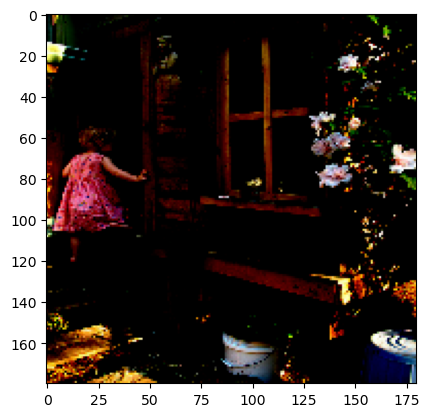
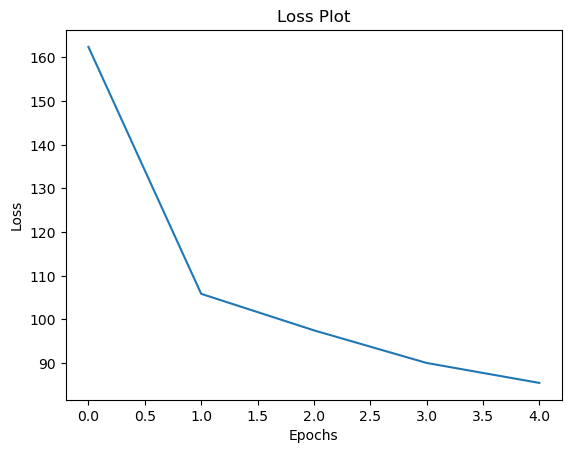
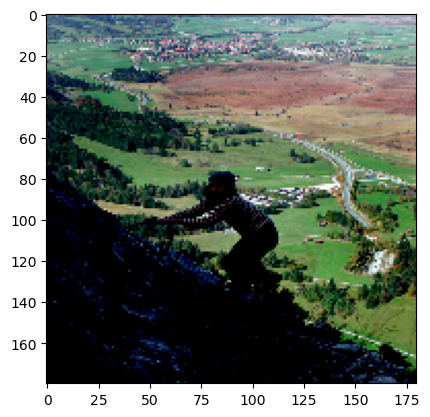